In [83]:
# Load the "autoreload" extension
%reload_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, os.pardir, 'src')
sys.path.append(src_dir)

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from functional import seq

# import my method from the source code
from libs.trading import candlesticks as cs

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1502917840&end=1502962840&period=300


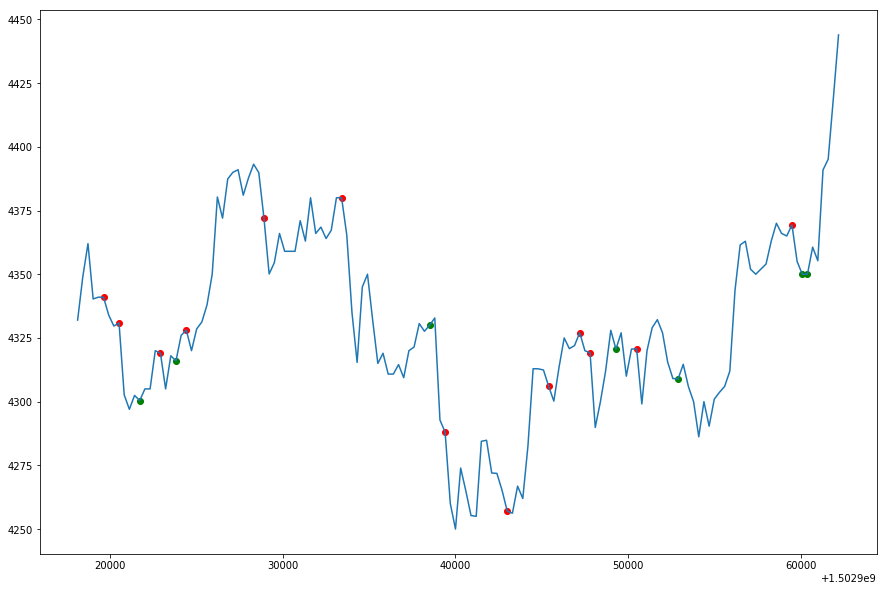

In [87]:
current_time = int(time.time())
data = fetch_prices('USDT_BTC', current_time - 150*300, current_time)
data = seq(data)
df = data \
    .zip(data.tail())\
    .map(lambda row: dict(row[0], **{'pattern': seq(cs.CandlestickPattern.evaluate(row[0], row[1])).head_option()}))\
    .to_pandas(columns=['date', 'low', 'high', 'open', 'close', 'pattern'])

df = df.set_index('date')

hammers = df[df['pattern'].isin([cs.CandlestickPattern.HAMMER])]
inverted_hammers = df[df['pattern'].isin([cs.CandlestickPattern.INVERTED_HAMMER])]
shooting_stars = df[df['pattern'].isin([cs.CandlestickPattern.SHOOTING_STAR])]
hanging_men = df[df['pattern'].isin([cs.CandlestickPattern.HANGING_MAN])]

plt.figure(figsize=(15, 10))
plt.plot(df['close'])
plt.scatter(hammers.index, hammers['close'], color='green')
plt.scatter(inverted_hammers.index, inverted_hammers['close'], color='red')
plt.scatter(hanging_men.index, hanging_men['close'], color='red')
plt.show()
#hanging_men

In [85]:
def fetch_prices(currencyPair, start, end):
    response = requests.get('https://poloniex.com/public?command=returnChartData', params={
        'currencyPair': currencyPair,
        'start': start,
        'end': end,
        'period': 300
    })
    
    print(response.url)
    
    return response.json()